# 04 Retail Dashboard (Matplotlib + Seaborn Only)

This notebook shows a static dashboard layout using only matplotlib & seaborn.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data/retail_sales_featured.csv")
df['order_date'] = pd.to_datetime(df['order_date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20000\927555002.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20000\927555002.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20000\927555002.py:29: UserWarning:

Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20000\927555002.py:29: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.

c:\Users\ASUS\AppData\Local

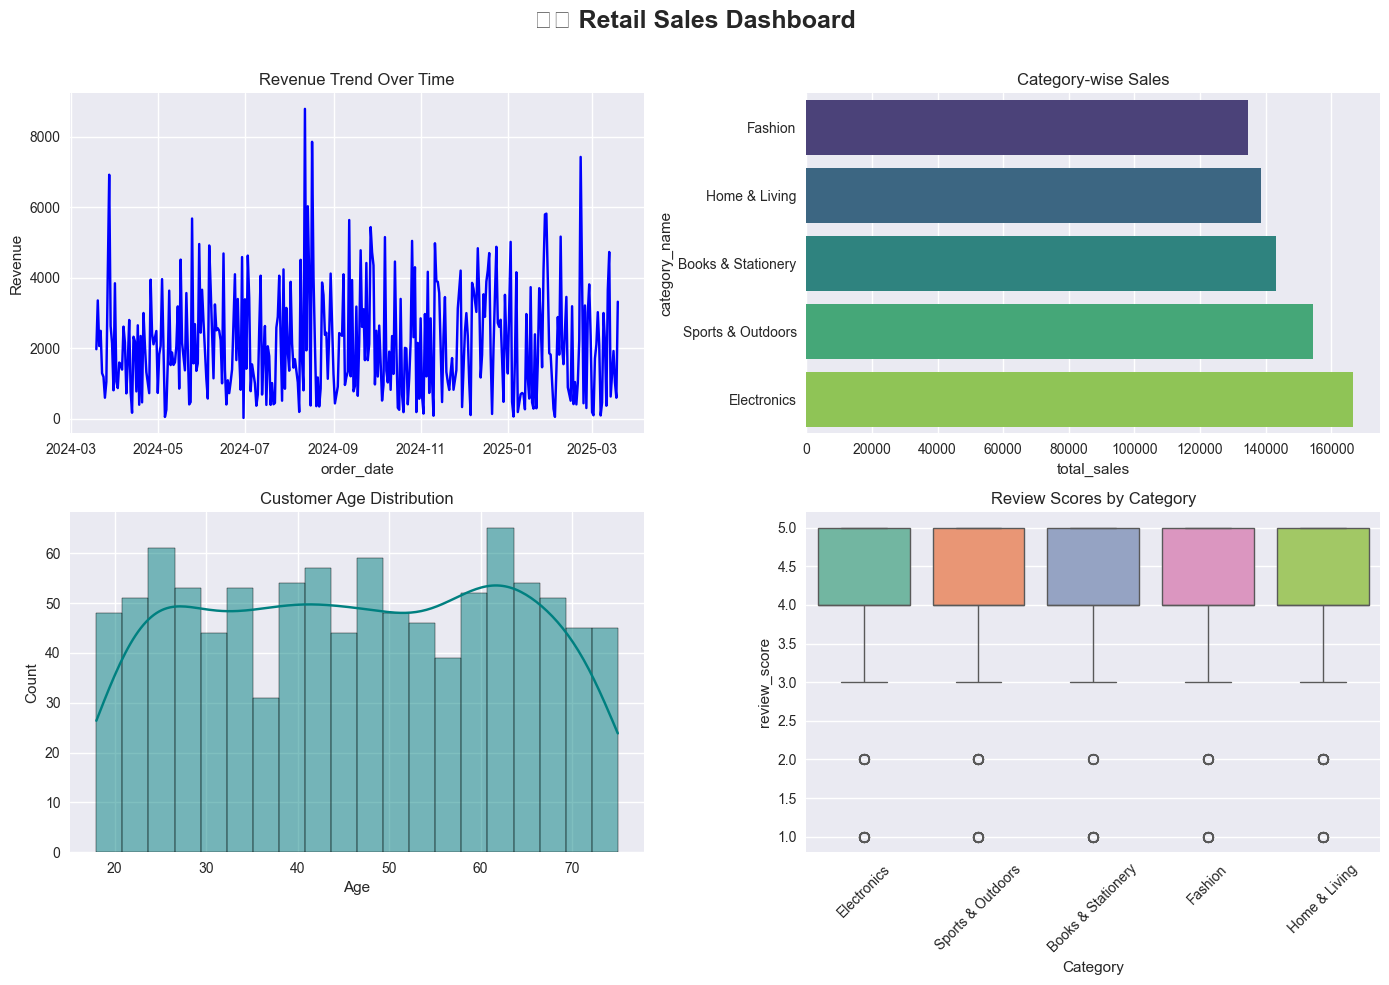

In [10]:
plt.style.use("seaborn-v0_8")


fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("🛍️ Retail Sales Dashboard", fontsize=18, fontweight="bold")

# 1. Revenue Trend
rev_trend = df.groupby('order_date')['total_sales'].sum().reset_index()
sns.lineplot(x="order_date", y="total_sales", data=rev_trend, ax=axes[0,0], color="blue")
axes[0,0].set_title("Revenue Trend Over Time")
axes[0,0].set_ylabel("Revenue")

# 2. Category Sales
cat_sales = df.groupby("category_name")['total_sales'].sum().reset_index()
sns.barplot(x="total_sales", y="category_name", data=cat_sales.sort_values("total_sales"), ax=axes[0,1], palette="viridis")
axes[0,1].set_title("Category-wise Sales")

# 3. Age Distribution
sns.histplot(df['age'], bins=20, kde=True, ax=axes[1,0], color="teal")
axes[1,0].set_title("Customer Age Distribution")
axes[1,0].set_xlabel("Age")

# 4. Review Scores by Category
sns.boxplot(x="category_name", y="review_score", data=df, ax=axes[1,1], palette="Set2")
axes[1,1].set_title("Review Scores by Category")
axes[1,1].set_xlabel("Category")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
